![title](images/gmit.PNG)

## GMIT HDip Data Analytics 2019
## Fundamentals of Data Analysis - Semester 2 - Assignment 1
## Thomas Healy G00376351

![title](images/numpya.PNG) 

## Table of contents

#### 1. Description of the assignment and selection of real world phenomenon
#### 2. Investigation of phenonmenon's variables
#### 3. Synthesis a dataset
#### 4. Detail research and implement the simulation

# 1. Description of assignment and selection of real world phenomenon

The assignment is re-create a real world phenonmenon using the ```numpy.random``` package to model the distributions in the phenomenon I have chosen. The phenonmenon I have chosen is that of HR data. The IBM dataset is a popular dataset that IBM developed to allow machine learning be ran on relatively large (1470 rows with 35 columns). It is a contrived datset as there are serious privacy and ethical issues surrounding the use of 'real' HR data in data science. I have selected this phenomenon as working in HR it can be difficult to find datasets that are relevant and generating my own dataset will be very handy as it can be used for HR or people Analytics purposes. I propose to take a few columns below and plot their distribution and then change some of them and build our own dataset based of that.

As HR has adopted a more data centric mindset, I think HR Generalists should have a good grounding in understanding the data they are guardians for in an organisation. 

The data(camelCase) that will make up our datatset are :

* EmployeeID
* CommuteDist
* SatisfactionLevel
* MonthlyHours
* Department
* Salary
* TimeSincePromo
* Tenure 
* Manager
* Churn
* PerformanceReview
* Age
* Gender





In [2]:
#Import our Packages, tell jupyter we want our plot inline and set the grid style in seaborn for more contrast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

# 2. Investigation of phenonmenon's variables

I will print some decriptive stats here to give us some guidelines of the data we need to re-create. This should take care of the numercial data. I will use countplots to understand the distribution of the  

In [3]:
df = pd.read_csv('IBMHRdata_set.csv')

In [4]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [5]:
#df.profile_report()

In [6]:
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


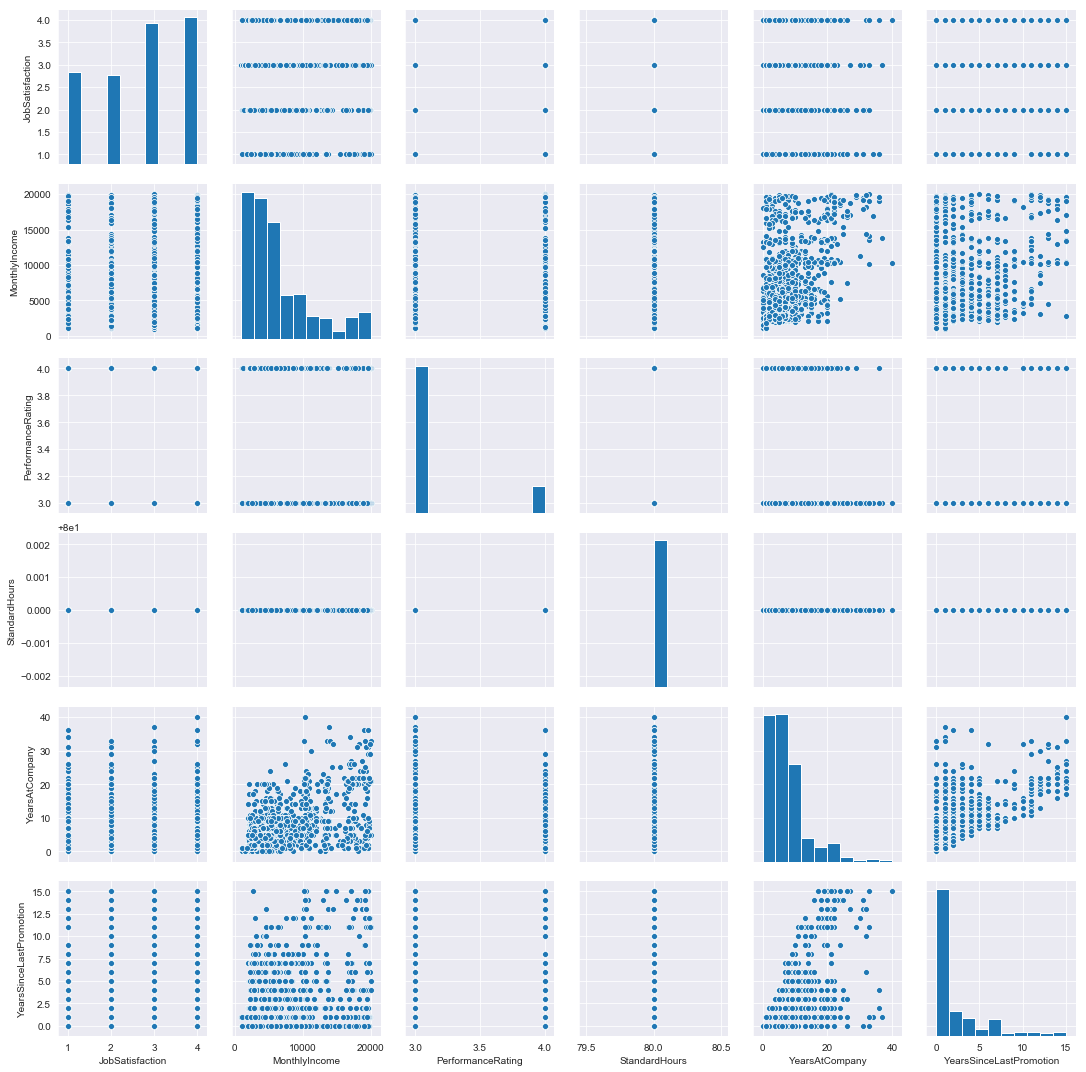

In [12]:
sns.pairplot(df,vars=['JobSatisfaction', 'MonthlyIncome', 'PerformanceRating', 'StandardHours', 'YearsAtCompany', 'YearsSinceLastPromotion'])

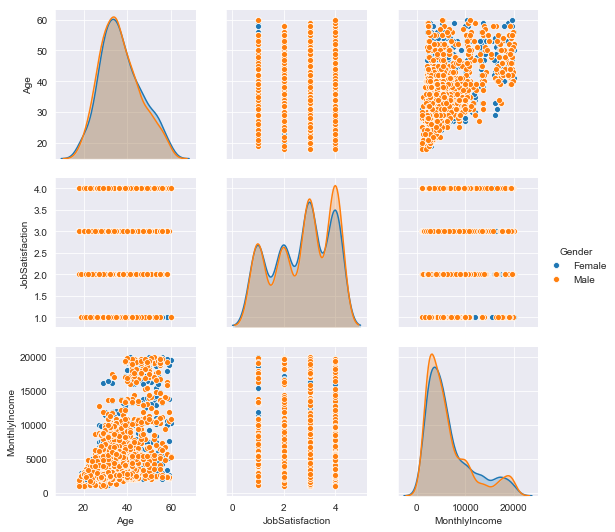

In [25]:
sns.pairplot(df,hue='Gender', vars=['Age', 'JobSatisfaction', 'MonthlyIncome'])

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

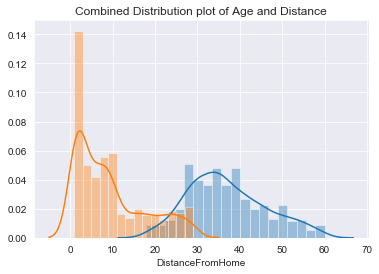

In [26]:
print(sns.distplot(df['Age']))
print(sns.distplot(df['DistanceFromHome']))
plt.title('Combined Distribution plot of Age and Distance')
plt.show

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

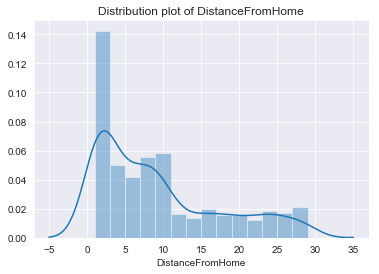

In [27]:
print(sns.distplot(df['DistanceFromHome']))
plt.title('Distribution plot of DistanceFromHome')
plt.show

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

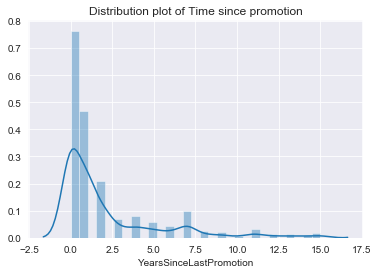

In [28]:
print(sns.distplot(df['YearsSinceLastPromotion']))
plt.title('Distribution plot of Time since promotion')
plt.show

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

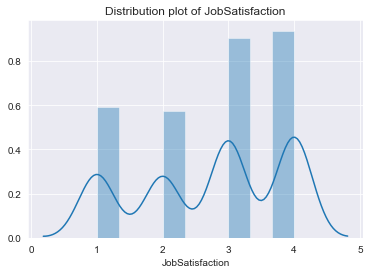

In [29]:
print(sns.distplot(df['JobSatisfaction']))
plt.title('Distribution plot of JobSatisfaction')
plt.show

In [ ]:
print(sns.distplot(df['StandardHours']))

Hmm this looks a bit suspicious so I think we will adopt a more realistic appraoch monthly hours.

In [ ]:
print(df.head)

We can create a new dataset in a number of ways. We can generate our data by creating our dataframe and then assign the values we create later for our variables to those cells. Alternatively, we can create our variables and then combine them to create our dataset.

# 3. Synthesis a dataset 

For the assignment, I am going to create a dataset that will hold 750 records for Aero-Tech Industries. I am going to create a 

### Create our Dataframe

In [ ]:
# Let's create our dataframe
df1 = pd.DataFrame(columns=['EmployeeID', 'Commute', 'SatisfactionLevel', 'WeeklyHours','Department', 'Salary', 'TimeSincePromo','Tenure', 'Manager', 'Churn', 'PerformanceReview', 'Age', 'Gender'])

In [ ]:
print(df1.head())

### Create our variables

In [ ]:
#Our employee ID is going to be a sequence to uniquely identify our employee
EmpID = np.arange(1, 751)

In [ ]:
np.random.seed(12)
Comm = np.random.gamma(.9, 15,  750)

In [ ]:
sns.distplot(Comm)

In [ ]:
ratings1 = ['0','1','2', '3', '4']
ratings2 = np.random.choice(ratings1,p=[0,.2,0.5, 0.2,0.1], size = 750)

In [ ]:
sns.countplot(ratings2)

In [ ]:
mu, sigma = 37.5, .8
hours = np.random.normal(mu, sigma, size=750)

In [ ]:
sns.distplot(hours)

In [ ]:
department = ['PeopleOps', 'Sales', 'CustomerSuccess', 'ProdDev']
depart = np.random.choice(department, p=[0.1, 0.3,0.3, 0.3],size=750)

In [ ]:
sns.countplot(depart)

In [54]:
np.random.seed(12)
shape, scale = 3.0, 15
sal = np.random.gamma(shape, scale,  750)

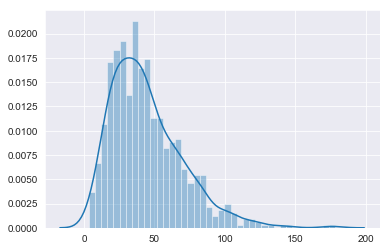

In [55]:
sns.distplot(sal,bins=40)

In [48]:
#EmpID

In [ ]:
df1['EmployeeID'] = EmpID

In [ ]:
df1['Commute'] = Comm

In [ ]:
df1['SatisfactionLevel'] = ratings2 

In [ ]:
df1['WeeklyHours'] = hours 

In [ ]:
df1['Department'] = depart

In [ ]:
df1[''] = 

In [ ]:
df1[''] = 

In [ ]:
df1[''] = 

In [ ]:
df1[''] = 

In [ ]:
df1.head

# 4. Detail research and implement the simulation 